<a href="https://colab.research.google.com/github/RegisKonan/FinalProject/blob/main/Copy_of_GROUP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### For the analysis of the data some python libraries are to be imported to facilitate the work

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [3]:
#us=pd.read_csv("USA_Housing.csv")
us=pd.read_csv("/content/USA_Housing (1).csv")
us

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


### Problem Statement
From the Data frame of US_Housing, there are 7 columns with total of 5000 observations.The data can be used to predict the Price of houses. We observe the variable "Address"  is not relevant in the prediction of house price and the remaining variables are relevant in the prediction.We choose variable Price as our outcome(dependent) because the rest variables can be determined independently to eachother

Data exploration is going to be done to observe what variables are more correlating to the variable price than the other

### Data Exploration

In [4]:
us.describe()## we observe 5000 counts then no null cell

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
us.size ## total number of observations

35000

In [6]:
us.shape

(5000, 7)

In [7]:
us.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
us.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
del us['Address']

In [10]:
us.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


## Data visulization

In [11]:
us1=us.sample(n=100,random_state=0)
us

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


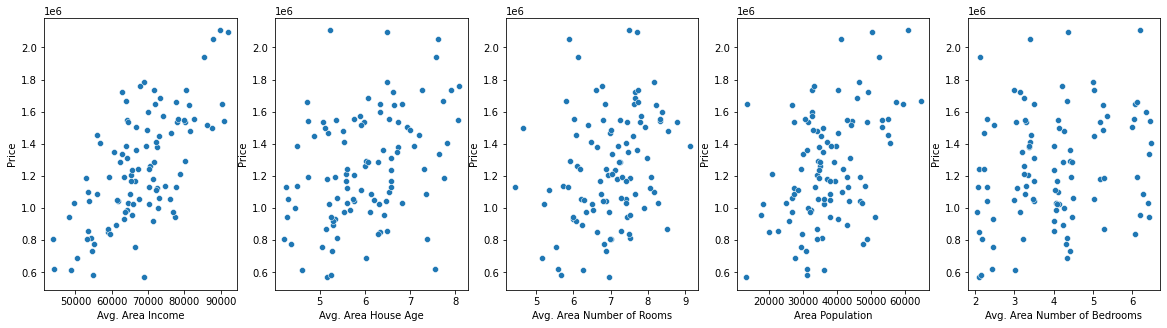

In [12]:
fig, axs = plt.subplots(ncols=5, figsize = (20, 5))
sns.scatterplot(data = us1, x = 'Avg. Area Income', y = 'Price', ax=axs[0])
sns.scatterplot(data = us1, x = 'Avg. Area House Age', y = 'Price', ax=axs[1])
sns.scatterplot(data = us1, x = 'Avg. Area Number of Rooms', y = 'Price', ax=axs[2])
sns.scatterplot(data = us1, x = 'Area Population', y = 'Price', ax=axs[3])
sns.scatterplot(data = us1, x = 'Avg. Area Number of Bedrooms', y = 'Price', ax=axs[4])
plt.show()

## Data Train/Test

In [13]:
# X=us[["Avg. Area Income","Avg. Area House Age","Area Population"]].values
# y=us.iloc[:,5].values
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
# model=LinearRegression()
# model.fit(X_train,y_train)


# X=us[["Avg. Area Income","Avg. Area House Age","Area Population","Avg. Area Number of Bedrooms"]].values
# y=us.iloc[:,5].values
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
# model=LinearRegression()
# model.fit(X_train,y_train)



X=us.iloc[:,0:5].values
y=us.iloc[:,5].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
model=LinearRegression()
model.fit(X_train,y_train)


# X=us[["Avg. Area Income"]].values
# y=us.iloc[:,5].values
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
# model=LinearRegression()
# model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=model.predict(X_test)
y_pred

array([ 971305.2171559 ,  954717.19848518,  907561.62786801,
        493251.36603036,  717846.54075562, 1050147.83569695,
        712749.72523196,  786730.40828389, 1804401.07723571,
       1538824.53251443,  743185.11443127, 1145962.64546487,
       2121930.18782562,  974081.46956725, 1152109.89196311,
        875083.71232262, 1105054.72869039,  801503.1250512 ,
       1205004.3293566 , 1408921.31567665, 1140508.64862889,
       1063287.89778645, 1436698.66412556, 1176185.01193252,
       1297298.51186765, 1120654.65101339, 1118341.02405207,
       1372882.33712618, 1589401.18137742, 1194289.3119116 ,
       1562677.3593149 , 2007793.98911753,  891709.15981123,
       1326060.16200967, 1184356.85325292,  749141.688065  ,
       1082944.09149544, 1579298.12680207, 1260383.5718463 ,
       1334423.40010873, 1596862.94057498,  961444.39684258,
       1219893.21685579, 1115884.15833105, 1034764.41129303,
       1702297.11628962, 1016847.82240769, 1618322.2183224 ,
       1153795.04960977,

In [15]:
model.coef_

array([2.16604083e+01, 1.65809651e+05, 1.20329408e+05, 2.19309558e+03,
       1.52858855e+01])

In [16]:
model.intercept_

-2646630.531055919

In [22]:

print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
#sklearn.metrics.r2_score(y_act,y_pred)

Mean Absolute Error: 82657.9460589218
Mean Squared Error: 10549721686.159266
Root Mean Squared Error: 102711.83810135648


In [23]:
d = {"actual":y_test.ravel(), "predicted":y_pred.ravel()}
df1 = pd.DataFrame(d).sample(10)
y_act=df1["actual"]
df1
#score=accuracy_score(y_test,y_pred)

,actual,predicted
512,7.387607e+05,6.711592e+05
219,1.383031e+06,1.258753e+06
792,1.735417e+06,1.879263e+06
579,1.523802e+06,1.518541e+06
260,1.405060e+06,1.336953e+06
607,1.412097e+06,1.343643e+06
610,9.571176e+05,7.999323e+05
925,1.168887e+06,1.239080e+06
102,5.628395e+05,6.261070e+05
137,1.791771e+06,1.773799e+06


-2646630.531055919
[2.16604083e+01 1.65809651e+05 1.20329408e+05 2.19309558e+03
 1.52858855e+01]
           Actual     Predicted
0    8.942511e+05  9.713052e+05
1    9.329794e+05  9.547172e+05
2    9.207479e+05  9.075616e+05
3    6.918549e+05  4.932514e+05
4    7.327332e+05  7.178465e+05
..            ...           ...
995  7.549606e+05  8.391244e+05
996  1.205568e+06  1.142525e+06
997  6.682555e+05  4.986132e+05
998  1.398760e+06  1.235228e+06
999  1.277381e+06  1.156382e+06

[1000 rows x 2 columns]


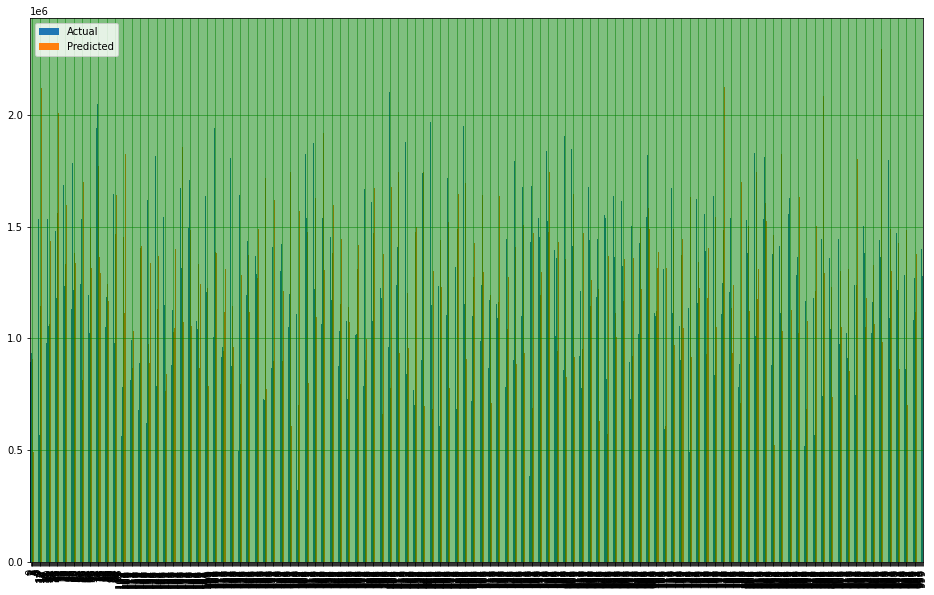

In [27]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
# df1 = pd.DataFrame(d).sample(10)
# df1.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

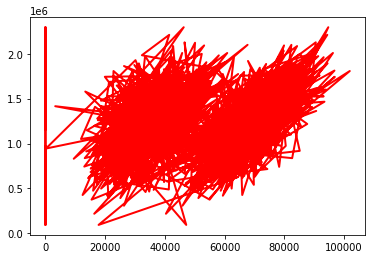

In [26]:
# plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()